In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [22]:
ds=pd.read_csv("Social_Network_Ads.csv")
ds

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [23]:
ds.duplicated().sum()

33

In [24]:
ds.drop_duplicates(inplace=True)

In [25]:
ds.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [26]:
x = ds[['Age','EstimatedSalary']]
y = ds[['Purchased']]

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [28]:
# spliting the dataset into Trainig and Testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.1,random_state=0)

In [29]:
from sklearn.tree import DecisionTreeClassifier
cls = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
cls.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

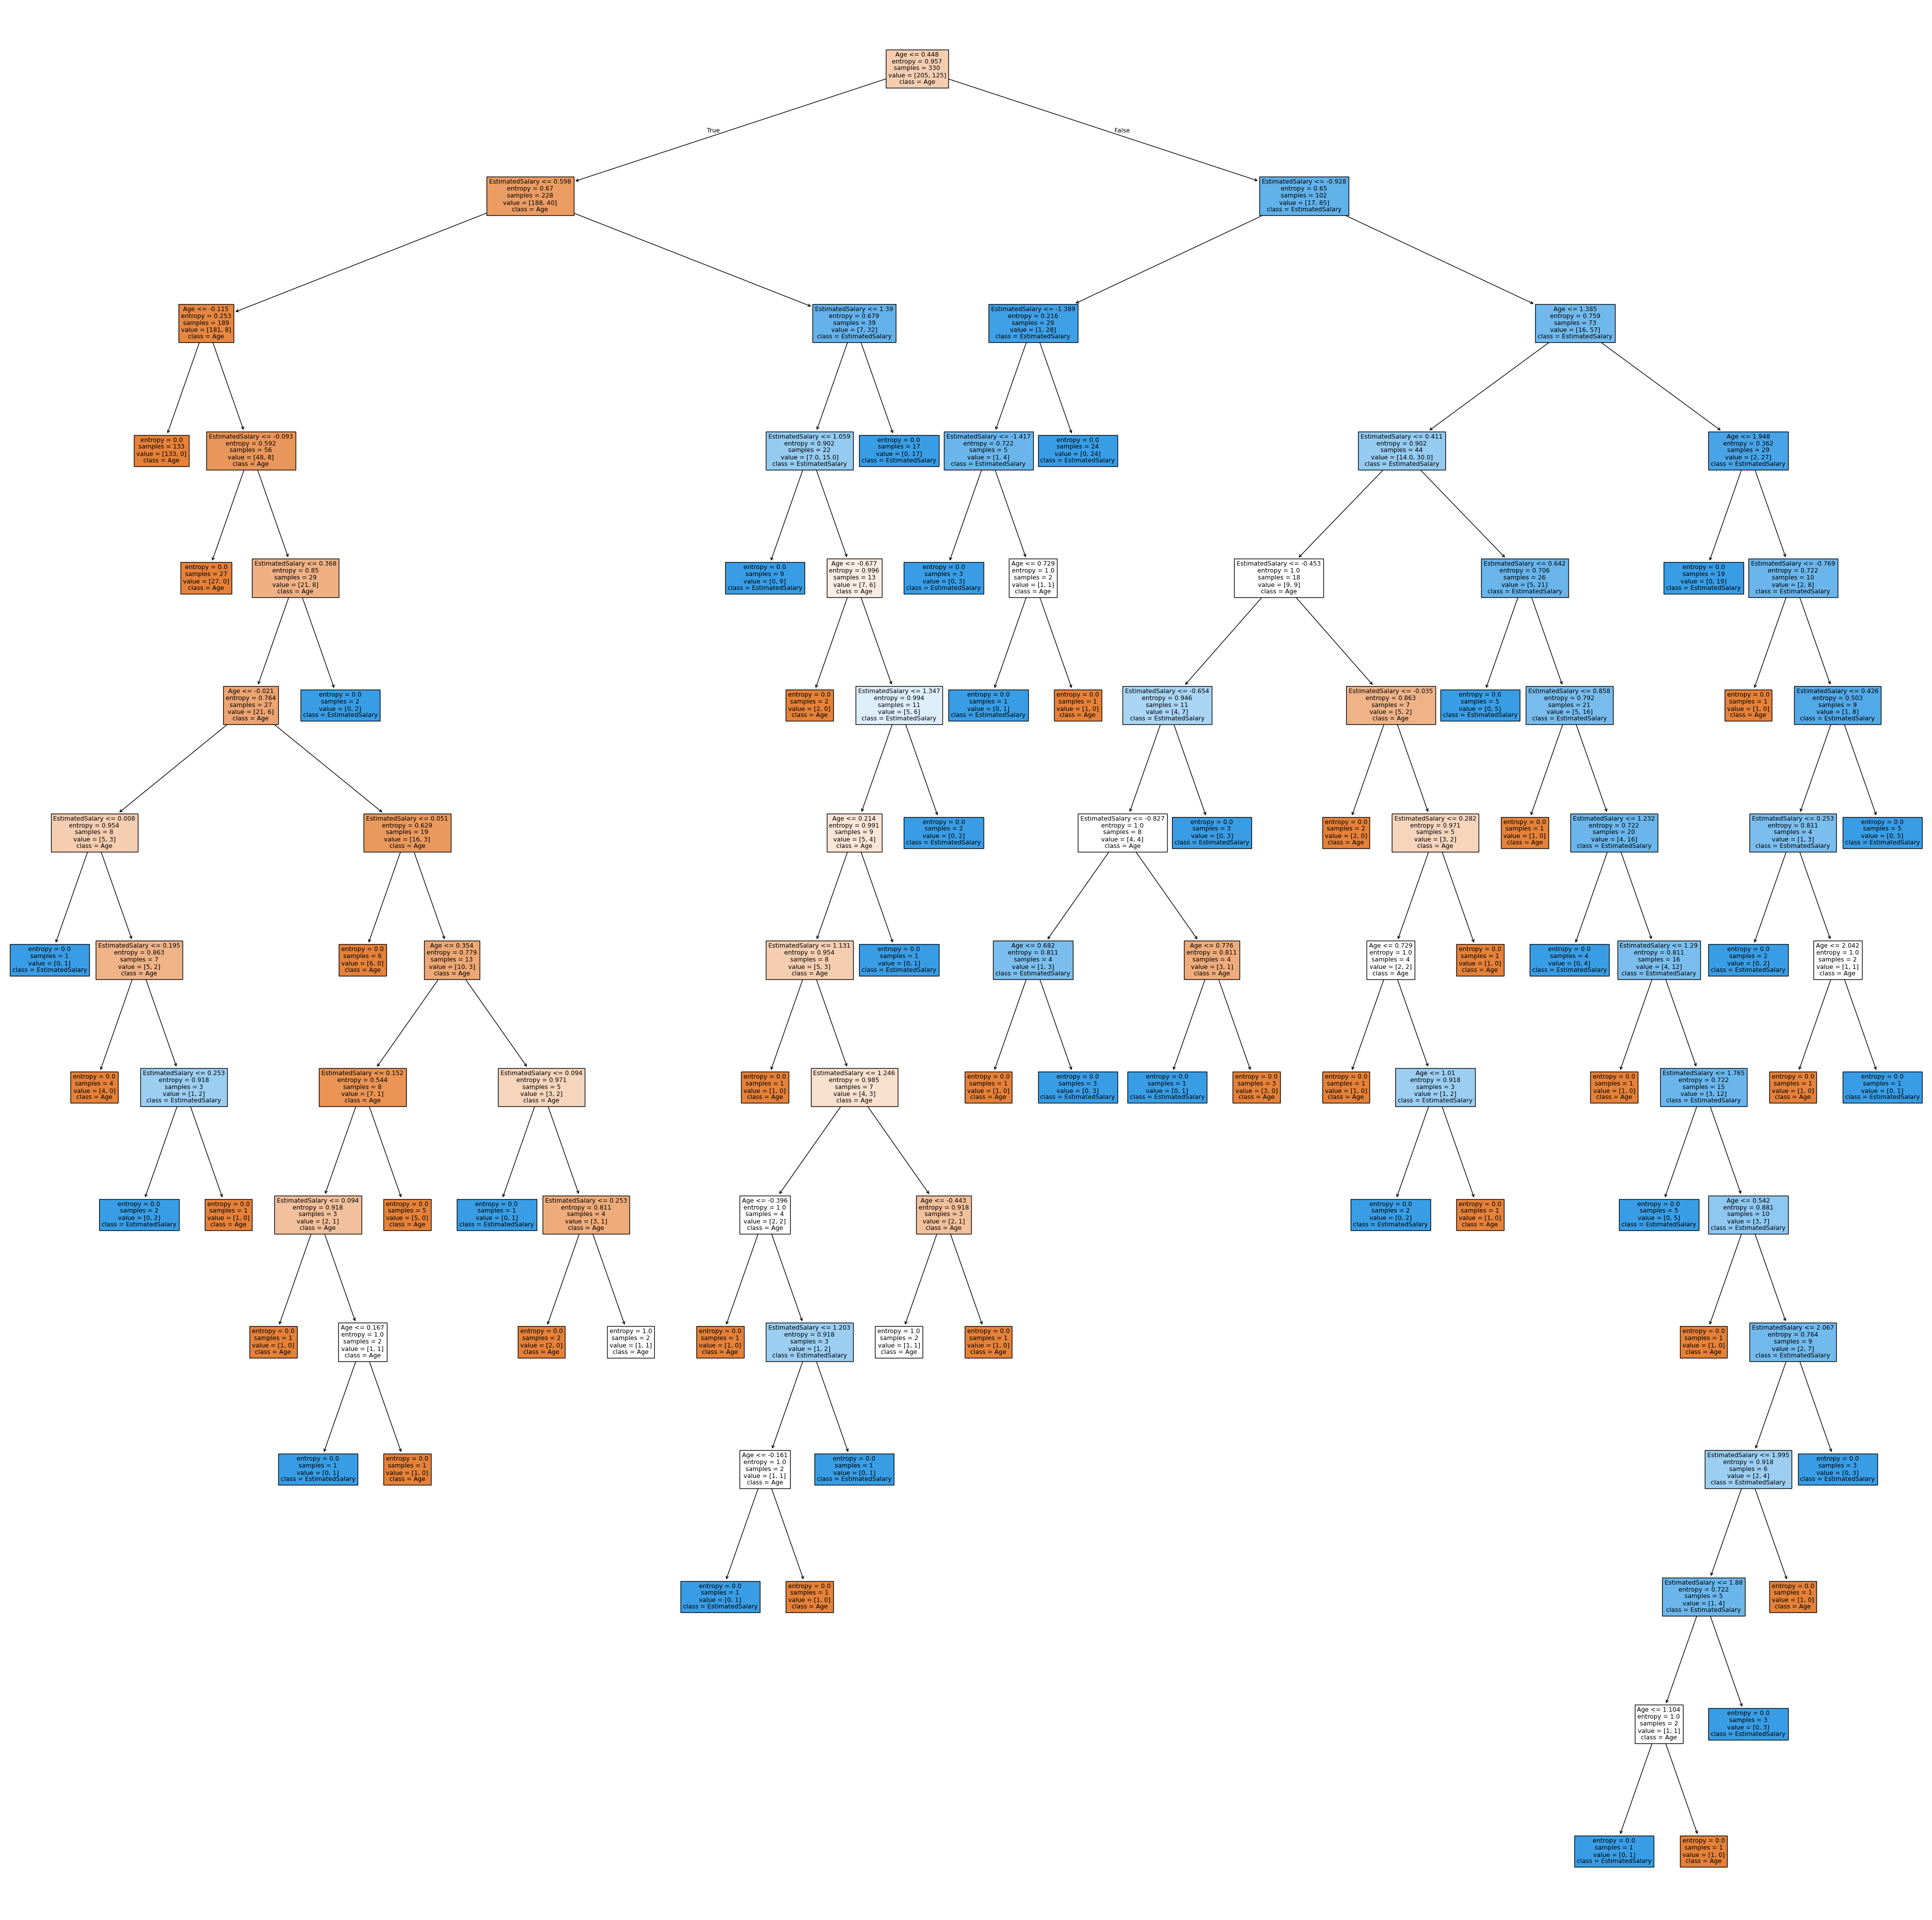

In [30]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))
plot_tree(cls, filled=True, feature_names=['Age', 'EstimatedSalary'], class_names=['Age','EstimatedSalary'])
plt.show()

In [31]:
result=cls.predict(sc.transform([[30, 150000]]))
result

array([1], dtype=int64)

In [33]:
from sklearn.metrics import accuracy_score
y_pred=cls.predict(x_test)
accuracy=accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 81.08%


In [34]:
age = float(input("Enter Age:"))
salary = float(input("Enter Salary:"))
myinput = pd.DataFrame(sc.transform([[age, salary]]), columns=['Age', 'EstimatedSalary'])
result = cls.predict(myinput)
if result[0]==1:
    print("Predication: User will purchase plan")
else:
    print("Predication: User will not purchase plan")

Enter Age: 45
Enter Salary: 50000


Predication: User will purchase plan
